# Drive Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Library Definition

In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Data Upload

In [3]:
X_model_file_path = "/content/drive/Shareddrives/Intro-data-science/data/X_model.csv"
Y_model_file_path = "/content/drive/Shareddrives/Intro-data-science/data/Y_model.csv"
X_test_file_path = "/content/drive/Shareddrives/Intro-data-science/data/X_exam.csv"

X_model = pd.read_csv(X_model_file_path)
Y_model = pd.read_csv(Y_model_file_path)
X_test = pd.read_csv(X_test_file_path)

# Data Analysis

In [4]:
X_Y_model = pd.concat([X_model, Y_model], axis=1)
X_Y_model.head()

,gender,age_code,region_code,c20220101,c20220102,c20220103,c20220104,c20220105,c20220106,c20220107,...,t20220818,t20220819,t20220820,t20220821,t20220822,t20220823,t20220824,t20220825,t20220826,business
0,1,13,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
1,1,5,1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
X_Y_model.describe()

,gender,age_code,region_code,c20220101,c20220102,c20220103,c20220104,c20220105,c20220106,c20220107,...,t20220818,t20220819,t20220820,t20220821,t20220822,t20220823,t20220824,t20220825,t20220826,business
count,800000.000000,800000.000000,800000.00000,95250.000000,91781.000000,146674.000000,131583.000000,144855.000000,126431.000000,123553.000000,...,55322.000000,61098.000000,43656.000000,38791.000000,65969.000000,59406.000000,59051.000000,87138.000000,68378.000000,800000.000000
mean,1.500781,6.091379,4.89038,1.573827,1.529957,1.812741,1.745659,1.830886,1.750338,1.756186,...,1.308648,1.322122,1.274785,1.260189,1.334612,1.317779,1.314711,1.368576,1.343883,0.065396
std,0.500000,2.688423,4.74455,1.258166,1.157516,1.540644,1.474500,1.603013,1.494281,1.511496,...,0.798659,0.834539,0.796477,0.805481,0.835918,0.808933,0.819072,0.824192,0.839766,0.247224
min,1.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,2.000000,6.000000,2.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,2.000000,8.000000,7.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,2.000000,14.000000,18.00000,64.000000,27.000000,53.000000,40.000000,51.000000,44.000000,50.000000,...,23.000000,40.000000,26.000000,37.000000,53.000000,37.000000,50.000000,24.000000,31.000000,1.000000


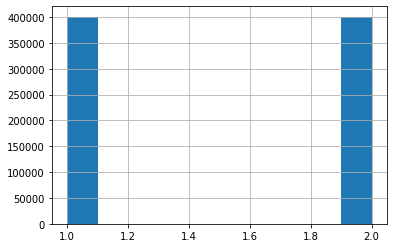

In [22]:
X_Y_model["gender"].hist()

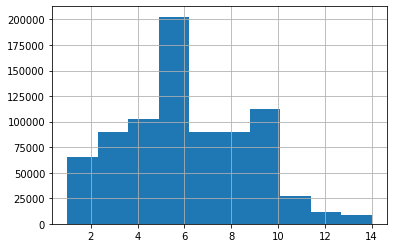

In [25]:
X_Y_model["age_code"].hist()

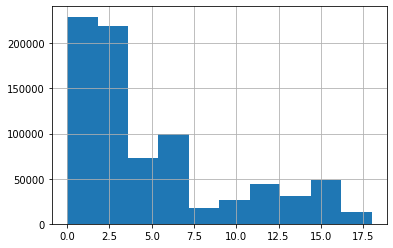

In [26]:
X_Y_model["region_code"].hist()

<ipython-input-74-7a1d75e34164>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  age_code_list.append(len(X_Y_model[X_Y_model["age_code"] == i][X_Y_model["business"] == 1])/age_code_len)


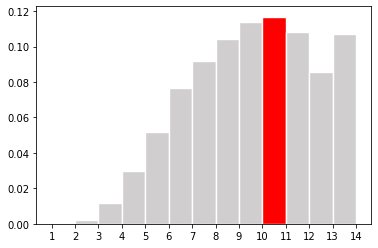

In [74]:
age_code_list = []
for i in range(1, 15):
  age_code_len = len(X_Y_model[X_Y_model["age_code"] == i])
  if age_code_len == 0:
    age_code_list.append(0)
  else:
    age_code_list.append(len(X_Y_model[X_Y_model["age_code"] == i][X_Y_model["business"] == 1])/age_code_len)


n, bins, patches = plt.hist(np.arange(1, 15), bins=np.arange(1, 15), weights = age_code_list
         ,color = "#D0CECE" # 바 색 변경
         ,edgecolor = 'white' # 선으로 구분
         ,linewidth = 1.4 # 선 굵기 설정
         )

patches[9].set_facecolor('red') # 구간 선택

plt.xticks(np.arange(1, 15))

plt.show()

<ipython-input-73-fb04adb68862>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  region_code_list.append(len(X_Y_model[X_Y_model["region_code"] == i][X_Y_model["business"] == 1])/region_code_len)


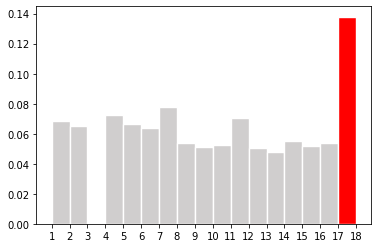

In [73]:
region_code_list = []
for i in range(1, 19):
  region_code_len = len(X_Y_model[X_Y_model["region_code"] == i])
  if region_code_len == 0:
    region_code_list.append(0)
  else:
    region_code_list.append(len(X_Y_model[X_Y_model["region_code"] == i][X_Y_model["business"] == 1])/region_code_len)


n, bins, patches = plt.hist(np.arange(1, 19), bins=np.arange(1, 19), weights = region_code_list
         ,color = "#D0CECE" # 바 색 변경
         ,edgecolor = 'white' # 선으로 구분
         ,linewidth = 1.4 # 선 굵기 설정
         )

patches[16].set_facecolor('red') # 구간 선택

plt.xticks(np.arange(1, 19))

plt.show()

In [6]:
rank = 10
corr_matrix = X_Y_model.corr()['business']
high_corr_columns = corr_matrix.sort_values(ascending = False)

print(high_corr_columns[:rank])

business     1.000000
t20220531    0.197122
c20220531    0.169472
s20220531    0.155676
t20220630    0.153764
t20220228    0.152759
t20220331    0.144180
age_code     0.142104
t20220530    0.139032
c20220530    0.138034
Name: business, dtype: float64


In [7]:
print(high_corr_columns[-rank:])

c20220313      0.008840
c20220626      0.008386
c20220522      0.007722
t20220814      0.007273
c20220619      0.006482
c20220201      0.004052
s20220525      0.001805
c20220814      0.001404
region_code   -0.014700
gender        -0.018105
Name: business, dtype: float64


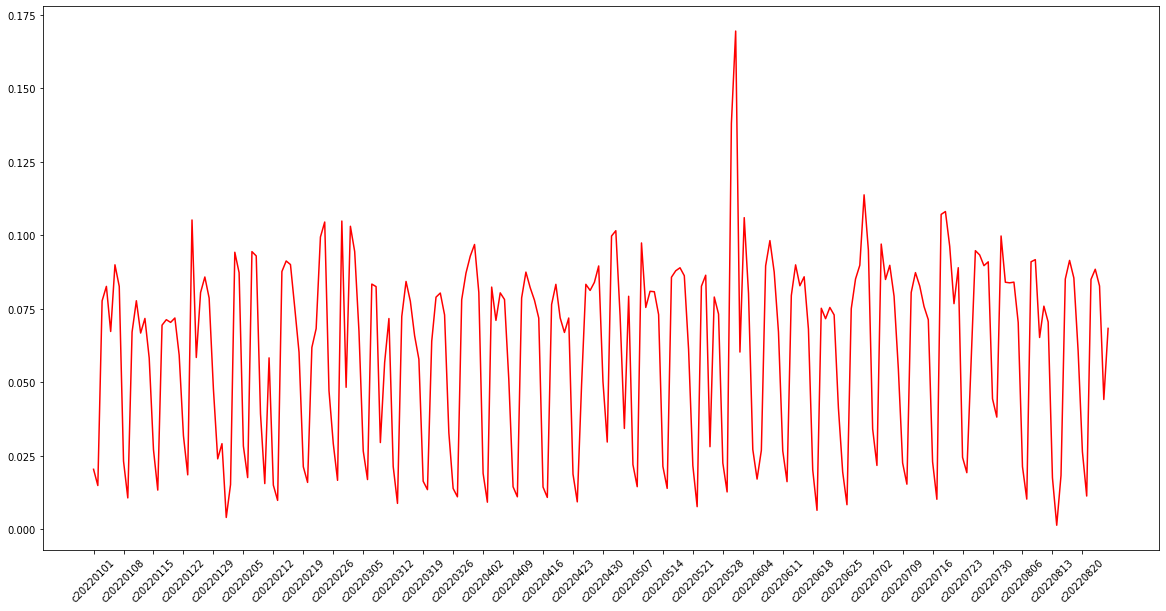

In [8]:
from matplotlib import pyplot as plt

number_of_login = corr_matrix['c20220101':'c20220826']

plt.figure(figsize = (20, 10))
plt.plot(number_of_login.index, number_of_login.values, 'r')
plt.xticks(np.arange(0, len(number_of_login), 7), rotation = 45)
plt.show()

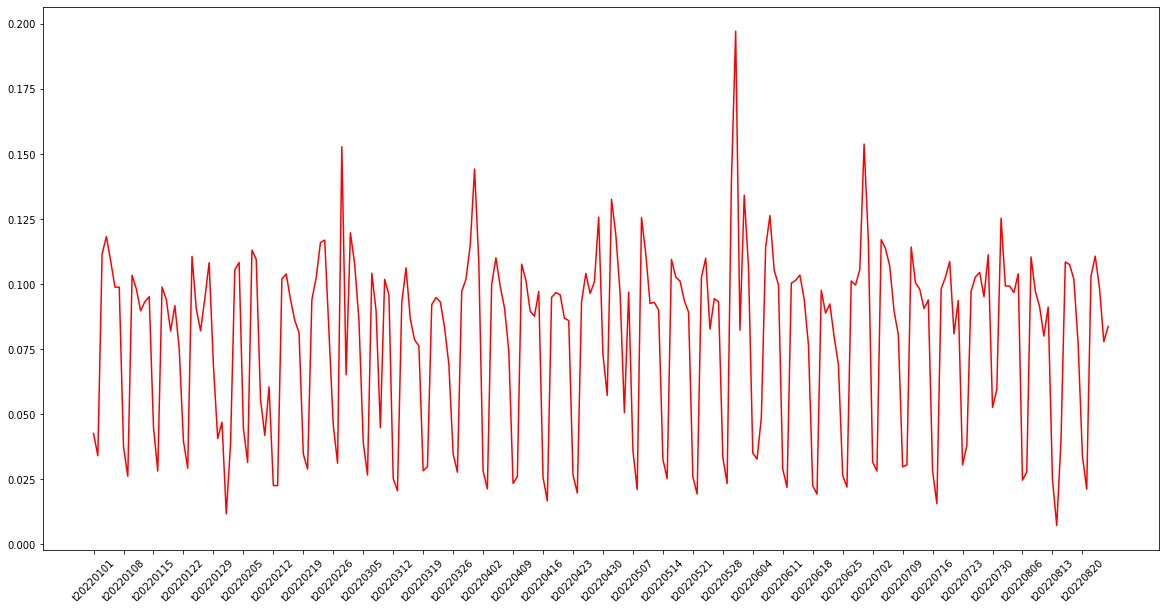

In [9]:
number_of_login_transfer = corr_matrix['t20220101':'t20220826']

plt.figure(figsize = (20, 10))
plt.plot(number_of_login_transfer.index, number_of_login_transfer.values, 'r')
plt.xticks(np.arange(0, len(number_of_login_transfer), 7), rotation = 45)
plt.show()

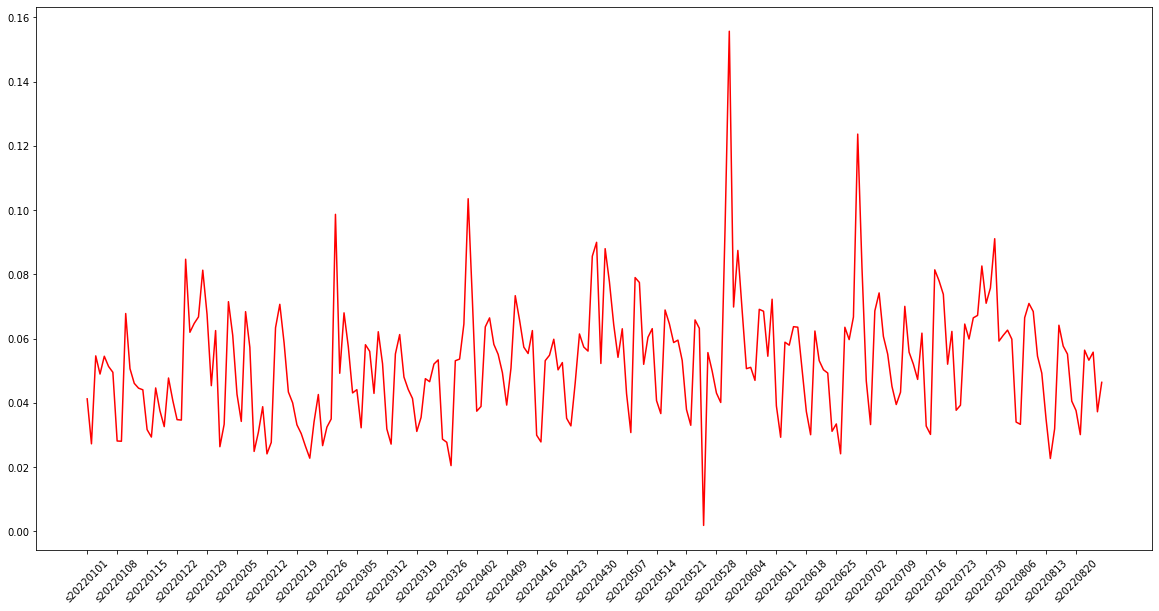

In [10]:
duration = corr_matrix['s20220101':'s20220826']

plt.figure(figsize = (20, 10))
plt.plot(duration.index, duration.values, 'r')
plt.xticks(np.arange(0, len(duration), 7), rotation = 45)
plt.show()

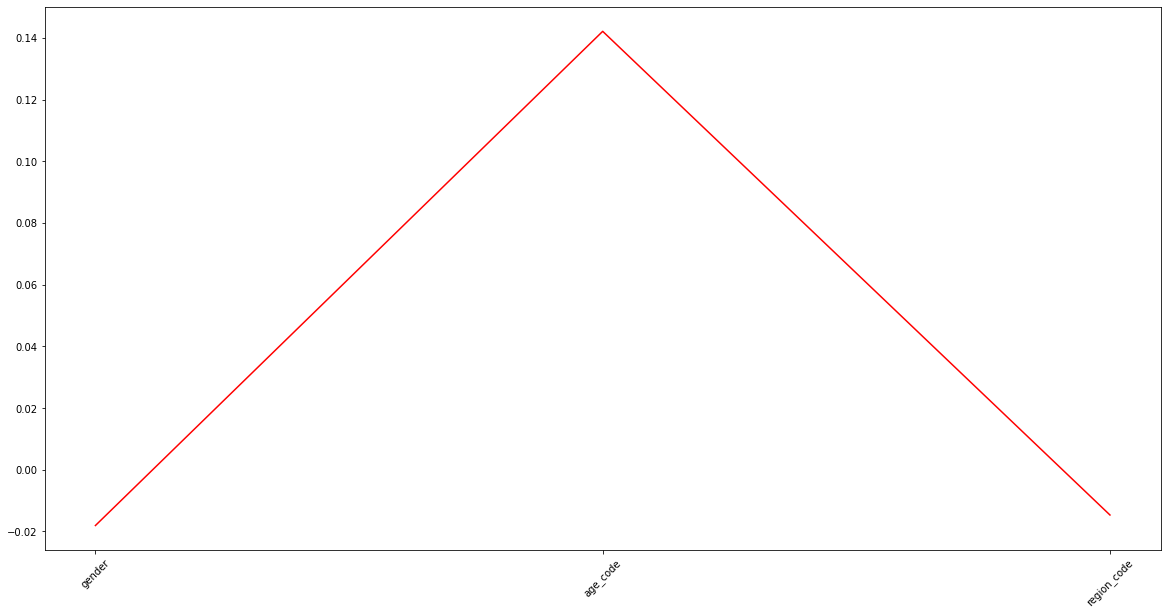

In [11]:
personal_info = corr_matrix[['gender', 'age_code', 'region_code']]

plt.figure(figsize = (20, 10))
plt.plot(personal_info.index, personal_info.values, 'r')
plt.xticks(rotation = 45)
plt.show()

# Preprocess

In [12]:
X_model_test = pd.concat([X_model, X_test], axis=0)
X_model_test.head()

,gender,age_code,region_code,c20220101,c20220102,c20220103,c20220104,c20220105,c20220106,c20220107,...,t20220817,t20220818,t20220819,t20220820,t20220821,t20220822,t20220823,t20220824,t20220825,t20220826
0,1,13,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1,5,1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
Y_model.head()

,business
0,0
1,0
2,0
3,0
4,0


# Feature Reduction

In [14]:
rank = 20
X_model_test = X_model_test[high_corr_columns[1:rank].index]
X_model_test.head()

,t20220531,c20220531,s20220531,t20220630,t20220228,t20220331,age_code,t20220530,c20220530,t20220602,t20220502,t20220608,t20220429,t20220509,t20220801,s20220630,t20220302,t20220503,t20220104
0,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Missing Value Handling

In [15]:
X_model_test.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 199999
Data columns (total 19 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   t20220531  91404 non-null    float64
 1   c20220531  205880 non-null   float64
 2   s20220531  204209 non-null   float64
 3   t20220630  92060 non-null    float64
 4   t20220228  100010 non-null   float64
 5   t20220331  85427 non-null    float64
 6   age_code   1000000 non-null  int64  
 7   t20220530  77615 non-null    float64
 8   c20220530  204157 non-null   float64
 9   t20220602  79439 non-null    float64
 10  t20220502  87426 non-null    float64
 11  t20220608  68142 non-null    float64
 12  t20220429  79098 non-null    float64
 13  t20220509  73228 non-null    float64
 14  t20220801  90698 non-null    float64
 15  s20220630  203450 non-null   float64
 16  t20220302  80345 non-null    float64
 17  t20220503  71255 non-null    float64
 18  t20220104  64620 non-null    float64
dtypes

<ipython-input-15-0312d011135d>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  X_model_test.info(verbose = True, null_counts = True)


In [16]:
X_model_test = X_model_test.fillna(0)

assert(X_model_test.isnull().sum().sum() == 0)

## Scaling

In [17]:
columns_scaled = [c for c in X_model_test.columns if c not in ['gender', 'age_code', 'region_code']]
 
scaler = MinMaxScaler()
scaler.fit(X_model_test[columns_scaled])

X_model_test[columns_scaled] = scaler.transform(X_model_test[columns_scaled])
X_model_test.head()

,t20220531,c20220531,s20220531,t20220630,t20220228,t20220331,age_code,t20220530,c20220530,t20220602,t20220502,t20220608,t20220429,t20220509,t20220801,s20220630,t20220302,t20220503,t20220104
0,0.0,0.0,0.0,0.0,0.0,0.0,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Imputation

In [18]:
X_model_test = pd.get_dummies(X_model_test, columns = ['age_code'])
X_model_test.head()

,t20220531,c20220531,s20220531,t20220630,t20220228,t20220331,t20220530,c20220530,t20220602,t20220502,...,age_code_5,age_code_6,age_code_7,age_code_8,age_code_9,age_code_10,age_code_11,age_code_12,age_code_13,age_code_14
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


In [19]:
X_model_length = X_model.shape[0]

X_model = X_model_test.iloc[:X_model_length, :]
X_test = X_model_test.iloc[X_model_length:, :]

In [20]:
X_model.to_csv("/content/drive/Shareddrives/Intro-data-science/data/X_model_preprocess_feat_reduc.csv")

In [21]:
X_test.to_csv("/content/drive/Shareddrives/Intro-data-science/data/X_test_preprocess_feat_reduc.csv")